In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot

import warnings
warnings.filterwarnings('ignore')

plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16)
plt.rc('axes', labelsize = 16, labelpad = 20)

df = pd.read_csv(
    'cleaned_data.csv'
)
for col in ['region', 'sex', 'children', 'smoker']:
    df[col] = df[col].astype('category')

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_transformed,charges_transformed
0,19,female,27.900,0,yes,southwest,16884.92400,4.632782,12.128980
1,18,male,33.770,1,no,southeast,1725.55230,5.058687,8.808596
2,28,male,33.000,3,no,southeast,4449.46200,5.005229,10.147521
3,33,male,22.705,0,no,northwest,21984.47061,4.213339,12.534950
4,32,male,28.880,0,no,northwest,3866.85520,4.707037,9.945637


Text(0.5, 0, 'Medical Costs')

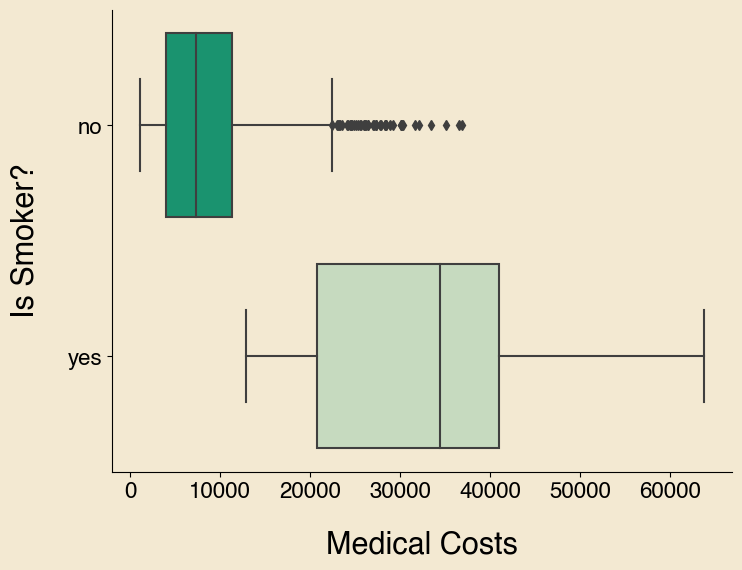

In [55]:
fig = plt.figure(figsize = (8,6), facecolor = '#f3e9d2')

my_palette = {
    'darkblue' : '#114b5f',
    'darkgreen' : '#1a936f',
    'mediumgreen' : '#88d498',
    'lightgreen' : '#c6dabf',
    'tan' : '#f3e9d2'
}

ax = sns.boxplot(
    data = df,
    y = 'smoker',
    x = 'charges',
    palette='tab20'
)

for dir in ['top','right']:
    ax.spines[dir].set_visible(False)


ax.set_facecolor('#f3e9d2')
ax.patches[0].set_facecolor(my_palette['darkgreen'])
ax.patches[1].set_facecolor(my_palette['lightgreen'])
ax.set_ylabel('Is Smoker?', weight = 'bold', fontsize = 22)
ax.set_xlabel('Medical Costs', weight = 'bold', fontsize = 22)


Text(0.5, 0, 'Patient Age')

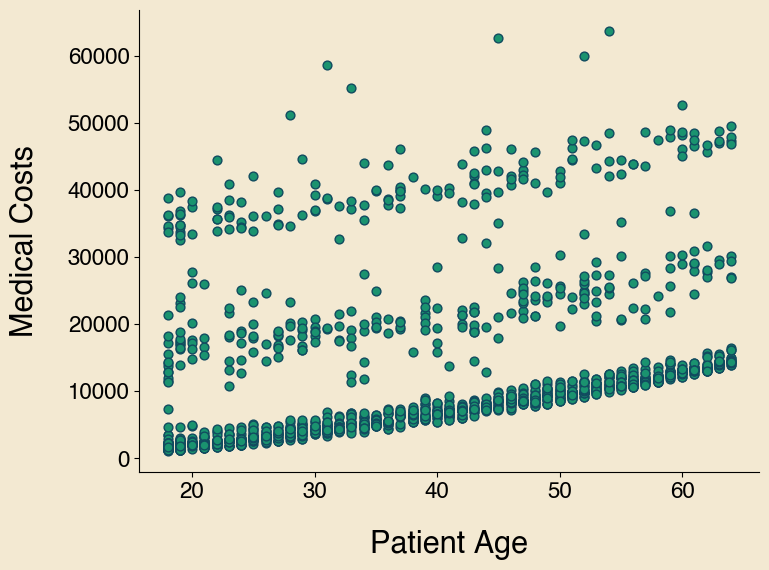

In [70]:
fig = plt.figure(figsize = (8,6), facecolor=my_palette['tan'])

ax = sns.scatterplot(
    x = df['age'],
    y = df['charges'],
    s = 40,
    edgecolor = my_palette['darkblue'],
    linewidth = 1,
    c = [my_palette['darkgreen']]
)

for direction in ['top', 'right']:
    ax.spines[direction].set_visible(False)

ax.set_facecolor('#f3e9d2')
ax.set_ylabel('Medical Costs', fontsize = 22)
ax.set_xlabel('Patient Age', fontsize = 22)

In [92]:
reg_3  = smf.ols(formula = 'charges ~ bmi + C(smoker)', data = df).fit()
reg_4 = smf.ols(formula = 'charges ~ bmi * C(smoker)', data = df).fit()

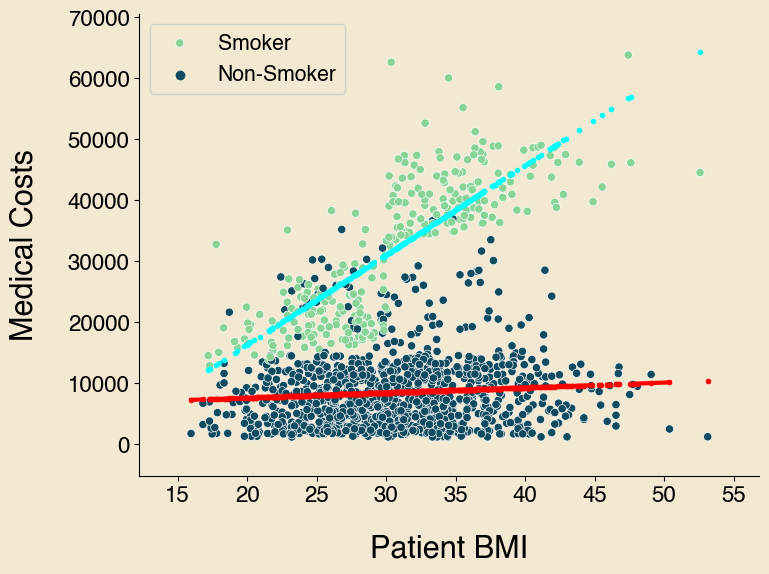

In [111]:
fig = plt.figure(figsize = (8,6), facecolor=my_palette['tan'])
gs = fig.add_gridspec(1,1)
ax = [None]
ax[0] = fig.add_subplot(gs[0,0])

sns.scatterplot(
    x  = df['bmi'],
    y = df['charges'],
    hue = df['smoker'],
    ax = ax[0],
    palette=[my_palette['darkblue'], my_palette['mediumgreen']]
    
)

interaction_plot(df['bmi'], df['smoker'], reg_4.fittedvalues, ax = ax[0], plottype='b', linewidth = 3)

ax[0].set_ylabel('Medical Costs', fontsize = 22)
ax[0].set_xlabel('Patient BMI', fontsize = 22)
ax[0].set_facecolor(my_palette['tan'])

fig.get_axes()[0].get_legend().remove()
plt.legend(['Smoker','Non-Smoker'],fontsize = 'x-small', facecolor = my_palette['tan'])


for direction in ['top', 'right']:
    ax[0].spines[direction].set_visible(False)

plt.show()